# Book Recommendation Model

### Import necessary libraries and load dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Load datasets
users = pd.read_csv('Users.csv')
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')

C:\Users\suman\AppData\Local\Temp\ipykernel_21152\651844884.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [3]:
# Get dataset info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


### Data Cleaning and Preparation

In [6]:
new_books = books.drop_duplicates('Book-Title')

In [7]:
# Merge ratings and new_books df
ratings_with_name = ratings.merge(new_books, on='ISBN')

In [8]:
ratings_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [9]:
# Drop non-relevant columns
ratings_with_name.drop(['ISBN', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis = 1, inplace = True)

In [10]:
ratings_with_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883079 entries, 0 to 883078
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              883079 non-null  int64 
 1   Book-Rating          883079 non-null  int64 
 2   Book-Title           883079 non-null  object
 3   Book-Author          883078 non-null  object
 4   Year-Of-Publication  883079 non-null  object
 5   Publisher            883078 non-null  object
dtypes: int64(2), object(4)
memory usage: 47.2+ MB


In [11]:
# Merge new 'ratings_with_name' df with users df
users_ratings_matrix = ratings_with_name.merge(users, on='User-ID')

In [12]:
# Drop non-relevant columns
users_ratings_matrix.drop(['Location', 'Age'], axis = 1, inplace = True)

In [13]:
# Print the first few rows of the new dataframe
users_ratings_matrix.head()

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,2313,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage
3,2313,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins
4,2313,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday


In [14]:
users_ratings_matrix.isna().sum()

User-ID                0
Book-Rating            0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              1
dtype: int64

In [15]:
users_ratings_matrix.dropna(inplace = True)

In [16]:
# Filter down 'users_ratings_matrix' on the basis of users who gave many book ratings
x = users_ratings_matrix.groupby('User-ID').count()['Book-Rating'] > 100
knowledgeable_users = x[x].index
filtered_users_ratings = users_ratings_matrix[users_ratings_matrix['User-ID'].isin(knowledgeable_users)]

In [17]:
# Filter down 'users_ratings_matrix' on the basis of books with most ratings
y = filtered_users_ratings.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index
final_users_ratings = filtered_users_ratings[filtered_users_ratings['Book-Title'].isin(famous_books)]

In [18]:
# Pivot table creation
pivot_table = final_users_ratings.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating')

In [19]:
# Filling the NA values with '0'
pivot_table.fillna(0, inplace = True)
pivot_table.head()

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,274808,275020,275970,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Standardize the pivot table
scaler = StandardScaler(with_mean=True, with_std=True)
pivot_table_normalized = scaler.fit_transform(pivot_table)

### Model Building

In [21]:
similarity_score = cosine_similarity(pivot_table_normalized)

In [22]:
similarity_score

array([[ 1.        , -0.01859849,  0.08733311, ...,  0.01350255,
        -0.02201299, -0.02261981],
       [-0.01859849,  1.        , -0.0294832 , ..., -0.02238366,
        -0.03070822,  0.10549892],
       [ 0.08733311, -0.0294832 ,  1.        , ...,  0.00231518,
         0.00643198, -0.01337545],
       ...,
       [ 0.01350255, -0.02238366,  0.00231518, ...,  1.        ,
        -0.00500822, -0.01371862],
       [-0.02201299, -0.03070822,  0.00643198, ..., -0.00500822,
         1.        ,  0.00914464],
       [-0.02261981,  0.10549892, -0.01337545, ..., -0.01371862,
         0.00914464,  1.        ]])

In [23]:
def recommend(book_name):
    
    # Returns the numerical index for the book_name
    index = np.where(pivot_table.index==book_name)[0][0]
    
    # Sorts the similarities for the book_name in descending order
    similar_books = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1], reverse=True)[1:6]
    
    # To return result in list format
    data = []
    
    for index,similarity in similar_books:
        item = []
        # Get the book details by index
        temp_df = new_books[new_books['Book-Title'] == pivot_table.index[index]]
        
        # Only add the title, author, and image-url to the result
        item.extend(temp_df['Book-Title'].values)
        item.extend(temp_df['Book-Author'].values)
        item.extend(temp_df['Image-URL-M'].values)
        
        data.append(item)
    return data

In [24]:
recommend('1984')

[["Foucault's Pendulum",
  'Umberto Eco',
  'http://images.amazon.com/images/P/0345368754.01.MZZZZZZZ.jpg'],
 ['Tis : A Memoir',
  'Frank McCourt',
  'http://images.amazon.com/images/P/0684848783.01.MZZZZZZZ.jpg'],
 ['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ['The Glass Lake',
  'Maeve Binchy',
  'http://images.amazon.com/images/P/0440221595.01.MZZZZZZZ.jpg'],
 ['Summer Pleasures',
  'Nora Roberts',
  'http://images.amazon.com/images/P/0373218397.01.MZZZZZZZ.jpg']]

# Music Recommendation Model

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
 
import warnings
warnings.filterwarnings('ignore')

In [26]:
tracks = pd.read_csv('dataset.csv')
tracks.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [27]:
tracks.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

### Data Cleaning

In [28]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [29]:
tracks.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [30]:
tracks.dropna(inplace=True)
tracks.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [31]:
tracks = tracks.drop(['Unnamed: 0', 'track_id', 'album_name', 'explicit', 'time_signature'], axis = 1)

In [32]:
tracks.columns

Index(['artists', 'track_name', 'popularity', 'duration_ms', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'track_genre'],
      dtype='object')

### Exploratory Data Analysis

In [33]:
tracks['track_name'].nunique(), tracks.shape

(73608, (113999, 16))

In [34]:
tracks = tracks.sort_values(by=['popularity'], ascending=False)
tracks.drop_duplicates(subset=['track_name'], keep='first', inplace=True)

In [35]:
floats = []
for col in tracks.columns:
    if tracks[col].dtype == 'float':
        floats.append(col)
 
len(floats)

9

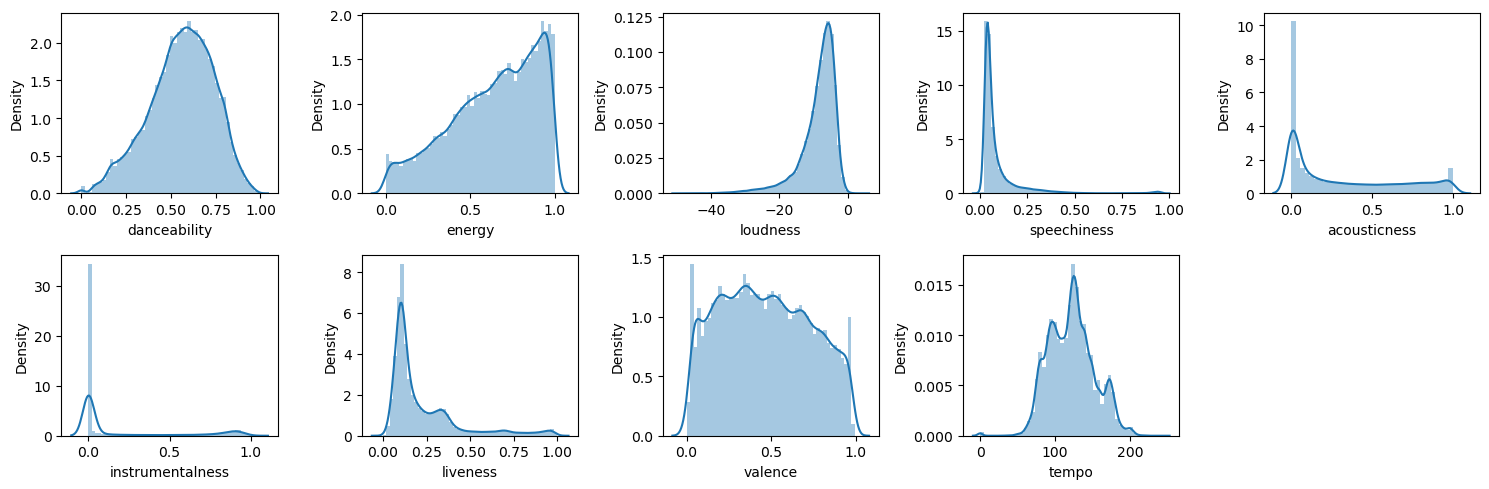

In [36]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
    plt.subplot(2, 5, i + 1)
    sns.distplot(tracks[col])
plt.tight_layout()
plt.show()

### Model Training

In [ ]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['track_genre'])

In [ ]:
def get_similarities(song_name, data):
   
    # Getting vector for the input song.
    text_array1 = song_vectorizer.transform(data[data['track_name']==song_name]['track_genre']).toarray()
    num_array1 = data[data['track_name']==song_name].select_dtypes(include=np.number).to_numpy()
   
    # We will store similarity for each row of the dataset.
    sim = []
    for idx, row in data.iterrows():
        name = row['track_name']
     
        # Getting vector for current song.
        text_array2 = song_vectorizer.transform(data[data['track_name']==name]['track_genre']).toarray()
        num_array2 = data[data['track_name']==name].select_dtypes(include=np.number).to_numpy()
 
        # Calculating similarities for text as well as numeric features
        text_sim = cosine_similarity(text_array1, text_array2)[0][0]
        num_sim = cosine_similarity(num_array1, num_array2)[0][0]
        sim.append(text_sim + num_sim)
     
        return sim

In [ ]:
def recommend_songs(song_name, data=tracks):
    # Base case
    if tracks[tracks['track_name'] == song_name].shape[0] == 0:
        print('This song is either not so popular or you\
        have entered invalid_name.\n Some songs you may like:\n')
     
        for song in data.sample(n=5)['track_name'].values:
            print(song)
        return
   
    data['similarity_factor'] = get_similarities(song_name, data)
 
    data.sort_values(by=['similarity_factor', 'popularity'],
                     ascending = [False, False],
                     inplace=True)
   
    # First song will be the input song itself as the similarity will be highest.
    display(data[['track_name', 'artists']][2:7])

In [ ]:
recommend_songs('Shape of You')